## Algoritma Kompetisi_Tak_Terbatas

1. initialize t,w,B,h,w,delta_t,simulation_length
2. while t<simulation_length do
        W:= W + (h*W_old-w*B*W_old)*delta_t
        B:= B + (l*B-b*B*W_old)*delta_t
3. display (t,W,B)
4. t <- t+delta_t

Text(0, 0.5, '$populasi$')

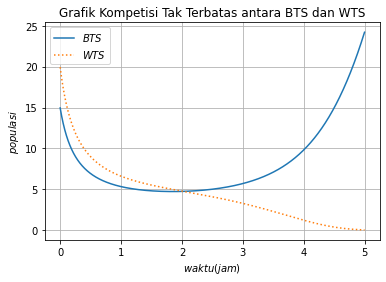

In [ ]:
# Program
# Inisiasi
import matplotlib.pyplot as plt
import pandas as pd

BTS_population = 15
BTS_birth_fraction = 1
BTS_death_proportionality = 0.2
WTS_population = 20
WTS_birth_fraction = 1
WTS_death_proportionality = 0.27
simulation_length = 5 #dalam jam
delta_t = 0.001 #dalam jam

numIteration = int(simulation_length/delta_t)
# Array
arr_t = [0 for i in range(numIteration)]
arr_BTS = [0 for i in range(numIteration)]
arr_WTS = [0 for i in range(numIteration)]

# looping
for i in range(numIteration):
    birth_BTS = BTS_birth_fraction*BTS_population
    death_BTS = BTS_death_proportionality*BTS_population*WTS_population
    BTS_population = BTS_population + (birth_BTS-death_BTS)*delta_t
    
    birth_WTS = WTS_birth_fraction*WTS_population
    death_WTS = WTS_death_proportionality*BTS_population*WTS_population
    WTS_population = WTS_population + (birth_WTS-death_WTS)*delta_t
    
    t = i*delta_t

# Print Grafik
plt.title("Grafik Kompetisi Tak Terbatas antara BTS dan WTS")
plt.plot(arr_t,arr_BTS,label='$BTS$')
plt.plot(arr_t,arr_WTS,':',label='$WTS$')
plt.grid(True)
plt.legend()
plt.xlabel('$waktu(jam)$')
plt.ylabel('$populasi$')


## Algoritma Kompetisi Terbatas

1. initialize t,w,B,h,W,delta_t,simulation_length, Kw, Kb
2. numIteration := simulation_length/delta_t
3. change_in_WTS := (1-W/Kw)*(h*W-w*B*W)
4. change_in_BTS := (1-B/Kb)*(l*B-b*B*W)
5. for i from 0 through numIterations do the following
        t := i*delta_t
        W := W + (change_in_WTS)*delta_t
        B := B + (change_in_BTS)*delta_t
        change_in_WTS := (1-W/Kw)*(h*W-w*B*W)
        change_in_BTS := (1-B/Kb)*(l*B-b*B*W)
        display (t,W,B)
   end
6. Stop

     waktu  populasi_WTS  populasi_BTS
0      0.0  8.000000e+01     60.000000
1      1.0  7.756800e+01     58.714286
2      2.0  7.498359e+01     57.340402
3      3.0  7.226705e+01     55.888929
4      4.0  6.944316e+01     54.373206
..     ...           ...           ...
496  496.0  3.789830e-26     67.946734
497  497.0  3.132460e-26     67.966664
498  498.0  2.588947e-26     67.986407
499  499.0  2.139601e-26     68.005964
500  500.0  1.768132e-26     68.025336

[501 rows x 3 columns]


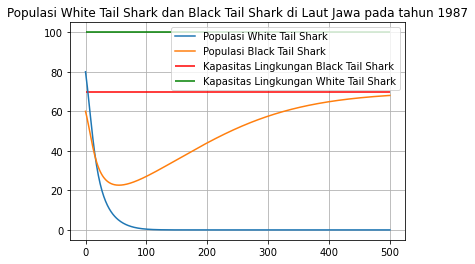

In [ ]:
# Program
import matplotlib.pyplot as plt
import pandas as pd

def Competition_Limited (simulation_length,delta_t):
    # Input
    numIteration = int(simulation_length/delta_t) + 1
    BTS_population = 60
    BTS_birth_fraction = 1
    BTS_death_proportionality = 0.2
    WTS_population = 80
    WTS_birth_fraction = 1
    WTS_death_proportionality = 0.27
    BTS_capacity_maximum = 70
    WTS_capacity_maximum = 100
    
    # Persamaan
    change_in_WTS = (1-(WTS_population/WTS_capacity_maximum))*(WTS_birth_fraction*WTS_population - WTS_death_proportionality*BTS_population*WTS_population)
    change_in_BTS = (1-(BTS_population/BTS_capacity_maximum))*(BTS_birth_fraction*BTS_population - BTS_death_proportionality*BTS_population*WTS_population)
    
    # Array
    arr_t = [0 for i in range(numIteration)]
    arr_BTS = [0 for i in range(numIteration)]
    arr_WTS = [0 for i in range(numIteration)]
    arr_t[0] = 0
    arr_BTS[0] = BTS_population
    arr_WTS[0] = WTS_population
    # LOOPING
    for i in range(1,numIteration):
        t = i*delta_t
        arr_t[i] = i
        WTS_population = WTS_population + change_in_WTS*delta_t
        arr_WTS[i] = WTS_population
        BTS_population = BTS_population + change_in_BTS*delta_t
        arr_BTS[i] = BTS_population
        
        change_in_WTS = (1-(WTS_population/WTS_capacity_maximum))*(WTS_birth_fraction*WTS_population - WTS_death_proportionality*BTS_population*WTS_population)
        change_in_BTS = (1-(BTS_population/BTS_capacity_maximum))*(BTS_birth_fraction*BTS_population - BTS_death_proportionality*BTS_population*WTS_population)
    return(arr_t,arr_WTS,arr_BTS)

BTS_capacity_maximum = 70
WTS_capacity_maximum = 100

df = pd.DataFrame(Competition_Limited(5,0.01))
df = df.transpose()
df = df.rename(columns={0:'waktu',1:'populasi_WTS',2:'populasi_BTS'})
print(df)

plt.title("Populasi White Tail Shark dan Black Tail Shark di Laut Jawa pada tahun 1987")
plt.plot(df.waktu,df.populasi_WTS,label = "Populasi White Tail Shark")
plt.plot(df.waktu,df.populasi_BTS,label = "Populasi Black Tail Shark")
plt.hlines(BTS_capacity_maximum,0,500,label = "Kapasitas Lingkungan Black Tail Shark",color = "red")
plt.hlines(WTS_capacity_maximum,0,500,label = "Kapasitas Lingkungan White Tail Shark",color = "green")
plt.grid(True)
plt.legend()
plt.show()